In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models,layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle


In [2]:
(xtrain,ytrain),(xtest,ytest) = tf.keras.datasets.mnist.load_data()

In [3]:
tf.config.set_visible_devices([], 'GPU')
visible_devices = tf.config.get_visible_devices()
for device in visible_devices:
    assert device.device_type != 'GPU'

In [4]:
ytrain_list = []
xtrain_list = []
ytest_list = []
xtest_list = []

In [5]:
for i in range(len(ytrain)):
    if ytrain[i] == 0 or ytrain[i] == 1:
        ytrain_list.append(ytrain[i])
        xtrain_list.append(xtrain[i])
        
for i in range(len(ytest)):
    if ytest[i] == 0 or ytest[i] == 1:
        ytest_list.append(ytest[i])
        xtest_list.append(xtest[i])

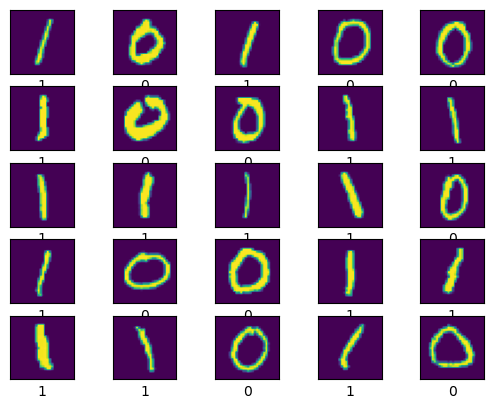

In [6]:
plt.figure()
for i in range(25): # 25 images
    plt.subplot(5,5,i+1) # matrix of 5 X 5 array
    plt.xticks([])
    plt.yticks([])
    plt.imshow(xtest_list[i]) # printing binary/black and white image
    plt.xlabel(ytest_list[i]) # Assigning name to each image
plt.show()

In [7]:
xtrain_list = np.asarray(xtrain_list)
xtest_list = np.asarray(xtest_list)

In [8]:
xtrain_list.shape

(12665, 28, 28)

In [9]:
xtrain_list = xtrain_list/255
xtest_list = xtest_list/255

In [10]:
xtrain_list = xtrain_list.reshape(12665,784)
xtest_list = xtest_list.reshape(2115,784)

In [11]:
ytrain_list = tf.keras.utils.to_categorical(ytrain_list,num_classes=2)
ytest_list = tf.keras.utils.to_categorical(ytest_list,num_classes=2)

In [12]:
model = keras.Sequential()
model.add(layers.Dense(784, activation='relu',name= 'layer_1'))
model.add(layers.Dense(25, activation='relu',name= 'layer_2'))
model.add(layers.Dense(2, activation='sigmoid',name= 'output_layer'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 

In [13]:
model.fit(xtrain_list, ytrain_list, epochs= 25, batch_size=500)

Epoch 1/25
26/26 [==============================] - 0s 6ms/step - loss: 0.0987 - accuracy: 0.9719
Epoch 2/25
26/26 [==============================] - 0s 6ms/step - loss: 0.0043 - accuracy: 0.9986
Epoch 3/25
26/26 [==============================] - 0s 6ms/step - loss: 0.0026 - accuracy: 0.9992
Epoch 4/25
26/26 [==============================] - 0s 6ms/step - loss: 0.0020 - accuracy: 0.9993
Epoch 5/25
26/26 [==============================] - 0s 6ms/step - loss: 0.0015 - accuracy: 0.9996
Epoch 6/25
26/26 [==============================] - 0s 6ms/step - loss: 0.0011 - accuracy: 0.9998
Epoch 7/25
26/26 [==============================] - 0s 6ms/step - loss: 8.0828e-04 - accuracy: 0.9999
Epoch 8/25
26/26 [==============================] - 0s 6ms/step - loss: 6.7734e-04 - accuracy: 0.9998
Epoch 9/25
26/26 [==============================] - 0s 6ms/step - loss: 5.8986e-04 - accuracy: 0.9998
Epoch 10/25
26/26 [==============================] - 0s 6ms/step - loss: 3.8461e-04 - accuracy: 0.9999
Epo

In [14]:
#model_name = "0 1 ML model"
#model.save('Desktop/Models/'+model_name)

In [15]:
test_loss, test_accuracy = model.evaluate(xtest_list, ytest_list)
print("Test accuracy:", test_accuracy)

67/67 [==============================] - 0s 852us/step - loss: 0.0015 - accuracy: 0.9995
Test accuracy: 0.9995272159576416


In [16]:
#tf.keras.backend.clear_session()